In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
path = '../data/'

In [3]:
# Read data on building features from the railbelt grid

building_features = pd.read_csv('../output/joined_data_nonmissing_railbelt.csv')

0

In [4]:
# Creating a variable that shows age in years

# get current date and time
now = datetime.now() 

# format current date to obtain year
year = int(now.strftime("%Y"))
print("year:", year)

building_features['age_yrs'] = year - building_features['age']
building_features.head()

year: 2022


,age,osm_id,areasq_ft,height,zip_code,zip_group,FD_1981_2010,TD_1981_2010,FD_2000,TD_2000,FD_2010,TD_2010,FD_80,TD_80,FD_90,TD_90,FD_recent_1991_2020,TD_recent_1991_2020,age_yrs
0,2004.0,485655552,1011.819332,-1.156223,99507,9950,-992.202746,1847.074732,-941.482003,1945.692756,-765.664519,2051.646462,-998.157617,1769.070361,-1036.968618,1826.461078,-914.705047,1941.266765,18.0
1,1994.0,821173300,943.256095,0.272816,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,28.0
2,1997.0,821210009,825.083952,0.406550,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,25.0
3,1995.0,821210030,597.375132,0.529883,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,27.0
4,1994.0,821210032,307.360121,-0.293179,99686,9968,-1832.949579,814.575094,-1804.555087,890.371345,-1494.731646,901.032579,-1854.483655,760.098123,-1839.809995,793.255815,-1713.032242,861.553246,28.0


In [5]:

# Create a list of zip codes by county

# Fairbanks
zip_fb = [99701, 99702, 99703, 99705, 99706, 99707, 99708, 99709, 99710, 
          99711, 99712, 99714, 99716, 99725, 99775, 99790]

# Anchorage
zip_an = [99501, 99502, 99503, 99504, 99505, 99506, 99507, 99508, 99509, 99510,
           99511, 99513, 99514, 99515, 99516, 99517, 99518, 99519, 99520, 99521,
           99522, 99523, 99524, 99529, 99530, 99540, 99599, 99695]


 # Building Age 

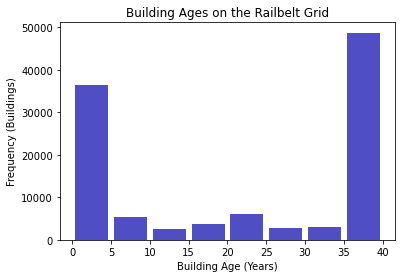

In [6]:
# Check the distribution of building age on the railbelt grid

plt.hist(x = building_features['age_yrs'], bins = list(range(0,41,5)), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Ages on the Railbelt Grid')

plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_age_railbelt.png', dpi =100)


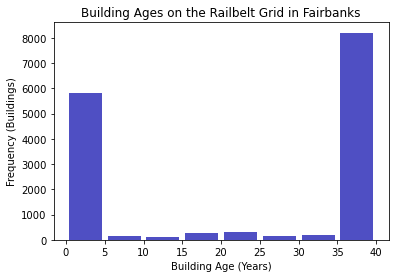

In [7]:
# Check the distribution of building age on the railbelt grid in Fairbanks

plt.hist(x = building_features['age_yrs'].loc[building_features['zip_code'].isin(zip_fb) ], bins = list(range(0,41,5)), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Ages on the Railbelt Grid in Fairbanks')

plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_age_railbelt_fb.png', dpi =100)

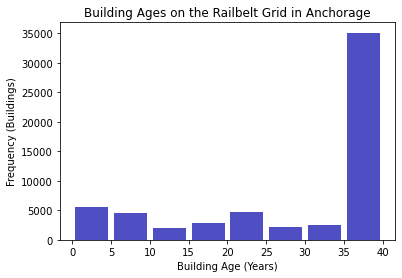

In [8]:
# Check the distribution of building age on the railbelt grid in Anchorage

plt.hist(x = building_features['age_yrs'].loc[building_features['zip_code'].isin(zip_an) ], bins = list(range(0,41,5)), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Ages on the Railbelt Grid in Anchorage')

plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_age_railbelt_an.png', dpi =100)

#  Building Heating Degree Days

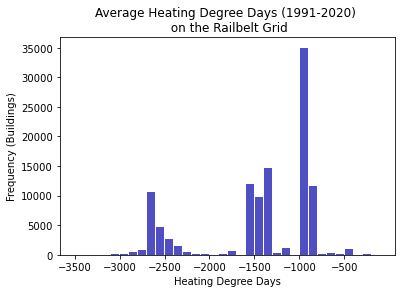

In [9]:
# Check the distribution of Heating Degree Days (30 yrs average) on the railbelt grid

plt.hist(x = building_features['FD_recent_1991_2020'], bins = list(range(-3500,0,100)), 
         color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Average Heating Degree Days (1991-2020) \n on the Railbelt Grid')

plt.xticks(list(range(-3500,0,500)))
plt.xlabel('Heating Degree Days')
plt.ylabel('Frequency (Buildings)')


plt.savefig(path + '../output/building_hdd_railbelt_1991-2020.png', dpi =100)

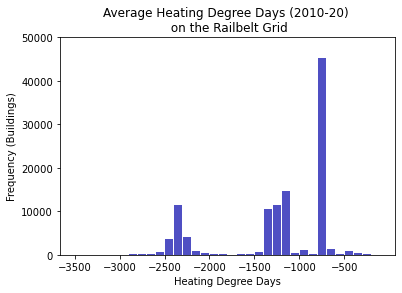

In [10]:
# Check the distribution of Heating Degree Days (10 yrs average) on the railbelt grid

plt.hist(x = building_features['FD_2010'], bins = list(range(-3500,0,100)), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Average Heating Degree Days (2010-20) \n on the Railbelt Grid')

plt.xticks(list(range(-3500,0,500)))
plt.ylim([0,5*10**4])
plt.xlabel('Heating Degree Days')
plt.ylabel('Frequency (Buildings)')


plt.savefig(path + '../output/building_hdd_railbelt_2010-20.png', dpi =100)

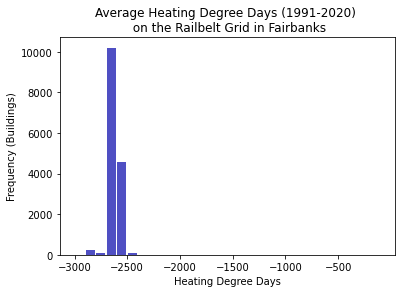

In [11]:
# Check the distribution of Heating Degree Days (30 yrs average) on the railbelt grid in Fairbanks

plt.hist(x = building_features['FD_recent_1991_2020'].loc[building_features['zip_code'].isin(zip_fb)], 
            bins = list(range(-3000,0,100)), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Average Heating Degree Days (1991-2020) \n on the Railbelt Grid in Fairbanks')

plt.xticks(list(range(-3000,0,500)))
plt.xlabel('Heating Degree Days')
plt.ylabel('Frequency (Buildings)')


plt.savefig(path + '../output/building_hdd_railbelt_1991-2020_fb.png', dpi =100)

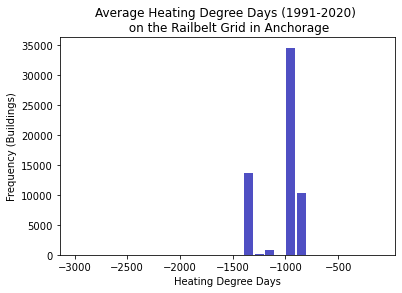

In [12]:
# Check the distribution of Heating Degree Days (30 yrs average) on the railbelt grid in Anchorage

plt.hist(x = building_features['FD_recent_1991_2020'].loc[building_features['zip_code'].isin(zip_an)], 
            bins = list(range(-3000,0,100)), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Average Heating Degree Days (1991-2020) \n on the Railbelt Grid in Anchorage')

plt.xticks(list(range(-3000,0,500)))
plt.xlabel('Heating Degree Days')
plt.ylabel('Frequency (Buildings)')


plt.savefig(path + '../output/building_hdd_railbelt_1991-2020_an.png', dpi =100)

# Building Height

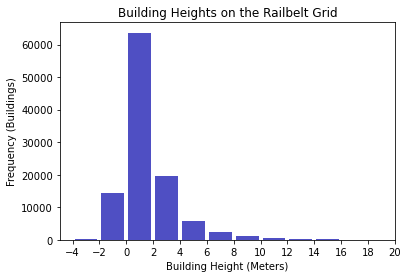

In [13]:
# Check the distribution of building height on the railbelt grid

plt.hist(x = building_features['height'], bins = list(range(-4,20,2)),  color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Heights on the Railbelt Grid')

plt.xticks(list(range(-4,22,2)))
plt.xlabel('Building Height (Meters)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_height_railbelt.png', dpi =100)

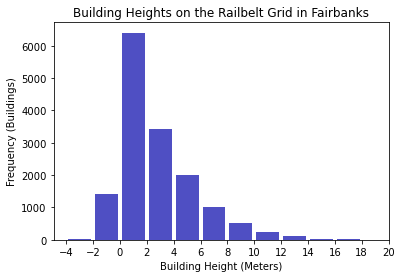

In [14]:
# Check the distribution of building height on the railbelt grid in Fairbanks

plt.hist(x = building_features['height'].loc[building_features['zip_code'].isin(zip_fb)],
        bins = list(range(-4,20,2)), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Heights on the Railbelt Grid in Fairbanks')

plt.xticks(list(range(-4,22,2)))
plt.xlabel('Building Height (Meters)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_height_railbelt_fb.png', dpi =100)

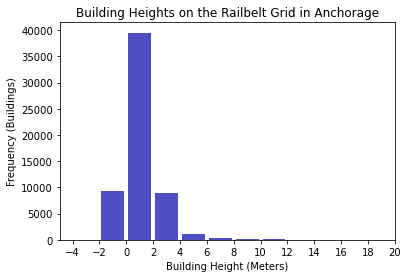

In [15]:
# Check the distribution of building height on the railbelt grid in Anchorage

plt.hist(x = building_features['height'].loc[building_features['zip_code'].isin(zip_an)],
        bins = list(range(-4,20,2)), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Building Heights on the Railbelt Grid in Anchorage')

plt.xticks(list(range(-4,22,2)))
plt.xlabel('Building Height (Meters)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_height_railbelt_an.png', dpi =100)

# Building Area

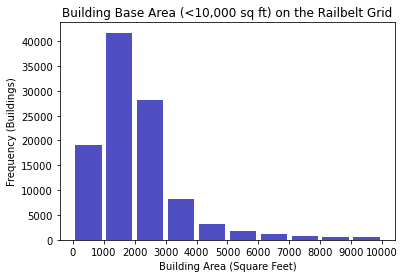

In [16]:
# Check the distribution of building height for buildings less than 10,000 sq ft on the railbelt grid

plt.hist(x = building_features['areasq_ft'].loc[building_features['areasq_ft']<10**4], 
         bins = list(range(0,10**4+1, 10**3)) ,color='#0504aa', alpha=0.7, rwidth=0.85)

plt.title('Building Base Area (<10,000 sq ft) on the Railbelt Grid')

plt.xticks(list(range(0,10**4+1, 10**3)))
plt.xlabel('Building Area (Square Feet)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_area_railbelt.png', dpi =100)

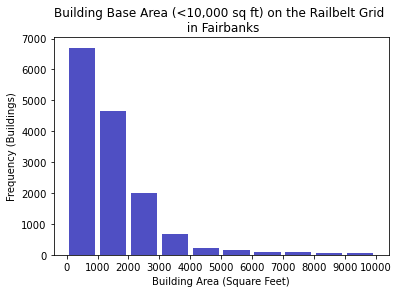

In [17]:
# Check the distribution of building height for buildings less than 10,000 sq ft on the railbelt grid in Fairbanks

plt.hist(x = building_features['areasq_ft'].loc[(building_features['areasq_ft']<10**4) &
                                                (building_features['zip_code'].isin(zip_fb))], 
         bins = list(range(0,10**4+1, 10**3)) ,color='#0504aa', alpha=0.7, rwidth=0.85)

plt.title('Building Base Area (<10,000 sq ft) on the Railbelt Grid \n in Fairbanks')

plt.xticks(list(range(0,10**4+1, 10**3)))
plt.xlabel('Building Area (Square Feet)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_area_railbelt_fb.png', dpi =100)

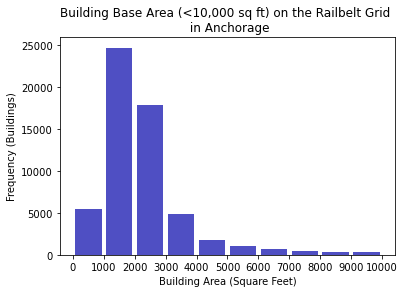

In [18]:
# Check the distribution of building height for buildings less than 10,000 sq ft on the railbelt grid in Anchorage

plt.hist(x = building_features['areasq_ft'].loc[(building_features['areasq_ft']<10**4) &
                                                (building_features['zip_code'].isin(zip_an))], 
         bins = list(range(0,10**4+1, 10**3)) ,color='#0504aa', alpha=0.7, rwidth=0.85)

plt.title('Building Base Area (<10,000 sq ft) on the Railbelt Grid \n in Anchorage')

plt.xticks(list(range(0,10**4+1, 10**3)))
plt.xlabel('Building Area (Square Feet)')
plt.ylabel('Frequency (Buildings)')

plt.savefig(path + '../output/building_area_railbelt_an.png', dpi =100)